**Ikram BOULAASSAL**

**IDo M2**

In [66]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

<H1> Exercice 1 : Applying scikit-learn k-NN classifier</H1>

<h2> create a dataset </h2>

In [40]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

<h2>  visualize the dataset </h2>

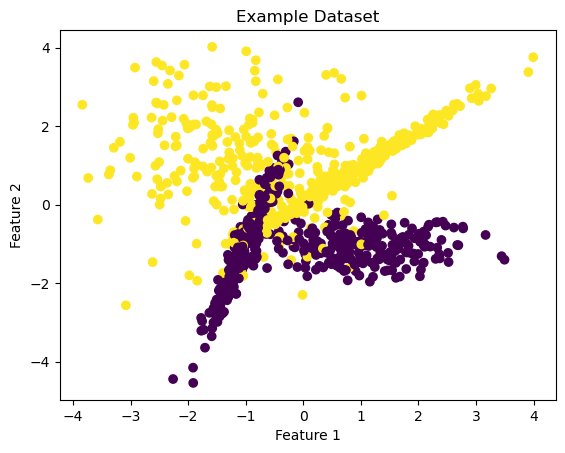

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Example Dataset')
plt.show()

<h2> split the dataset into train and test sets</h2>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> verification of dataset information.</h2>

In [43]:
print("Size of dataset:", len(X))
print("Number of features:", X.shape[1])
print("Classes in target values:", np.unique(y))

Size of dataset: 1000
Number of features: 2
Classes in target values: [0 1]


<h2> Train a 3-NN classifier </h2>

In [59]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

<h2> Predict labels for the test dataset and calculate the model score </h2>

In [60]:
y_pred = knn_classifier.predict(X_test)
model_score = knn_classifier.score(X_test, y_test)
print("Model Score:", model_score)

Model Score: 0.9366666666666666


<h2> Plot the learning curve </h2>

In [46]:
train_sizes, train_scores, test_scores = learning_curve(knn_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

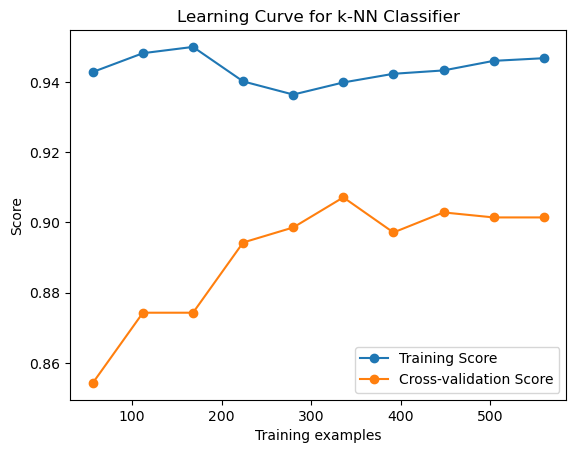

In [47]:
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation Score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for k-NN Classifier')
plt.legend(loc='best')
plt.show()

<H1> Exercice 2 : Kfold cross validation </H1>

<h2> perform Kfold cross validation to select the best k</h2>

In [48]:
param_grid = {'n_neighbors': np.arange(1, 11)}  # Check values of k from 1 to 10

In [51]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Use 5-fold cross-validation

In [52]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, scoring='accuracy')

In [53]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

<h2> Get the best k from the grid search</h2>

In [54]:
best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

Best k: 3


<h1> Exercice 3 : Implement your own k-NN regressor in Python</h1>

In [56]:
class KNNRegressor:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def _calculate_distance(self, point1, point2):
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((point1 - point2) ** 2))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(point1 - point2))
        else:
            raise ValueError("Invalid distance metric. Use 'euclidean' or 'manhattan'.")

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [self._calculate_distance(x, x_train) for x_train in self.X_train]
            sorted_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in sorted_indices]
            predictions.append(np.mean(k_nearest_labels))
        return np.array(predictions)

<h2> Create the regression dataset </h2>

In [61]:
X, y = make_regression(n_samples=100, noise=0.1, random_state=42)

<h2> Split the dataset into training and test sets </h2>

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Test the model with different values of k </h2>

In [65]:
for k_value in [1, 3, 5]:
    knn_regressor = KNNRegressor(k=k_value, distance_metric='euclidean')
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for k={k_value}: {mse_score}")

Mean Squared Error for k=1: 21344.581180726014
Mean Squared Error for k=3: 15366.470414321408
Mean Squared Error for k=5: 18384.407990809286
